# Procesamiento de Imagenes con K - means 
El siguiente trabajo presenta la aplicacion del metodo K-means de Machine Learning en el procesamiento de una imagen, esto se realiza con el fin de lograr agrupar los colores contenidos dentro de la imagen a tratar en funcion a su valor en RGB.

Una vez agrupado los colores en K clusters se reemplazara algunos grupos por colores que seran ingresados por el usuario, el objetivo del presente trabajo es cambiar de color la fachada de la Universidad Nacional de Ingenieria (PabellonUNI.jpg).

## Importacion de librerias a utilizar

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as col
from scipy import ndimage
from scipy.misc import imresize
from sklearn.cluster import KMeans
from sklearn import cluster
from mpl_toolkits.mplot3d import Axes3D
from random import random
import numpy as np

# Cargar el Drive helper y mount
from google.colab import drive
# Link y Codigo de autorizacion a Drive
drive.mount('/content/drive_all')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive_all


## Lectura de archivo .JPG 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


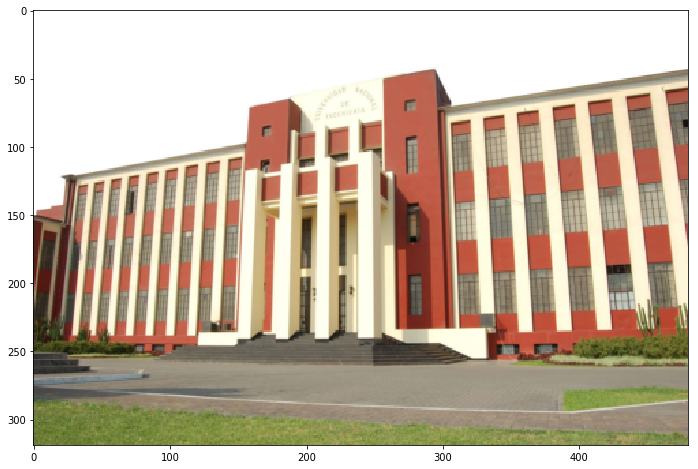

In [0]:
# Lectura de la imagen
image_orin = plt.imread("/content/drive_all/My Drive/PabellonUNI.jpg")

# Escalamiento de la imagen a 320x480
image= imresize(image_orin,0.3)

# Ploteamos la imagen reescalada
plt.figure(figsize = (15,8))
plt.imshow(image)

In [0]:
# Verificamos la forma de la matriz
image.shape

(319, 480, 3)

Para agrupar la imagen, debemos convertirla en una matriz bidimensional como el valor RGB.

In [0]:
# Extraer la forma inicial de la matriz
x, y, z = image.shape

# Transformamos la matriz en una bidimensional
image_2d = image.reshape(x*y, z)

# Verificamos la forma
image_2d.shape

(153120, 3)

Las siguientes lineas de codigo muestran la curva de Elbow que se utiliza para ver los valores adecuados para K (numero de grupos), por simple inspeccion se determina que el valor adecuado para K es cualqueir valor mayor a 4.

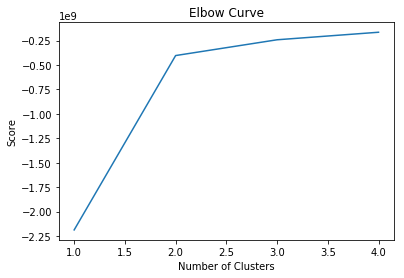

In [0]:
Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(image_2d).score(image_2d) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Aplicamos el metodo de K-means a la imagen, para el caso particular de querer determinar los colores de la fachada se observa que el valor adecuado para K es igual a 17.

In [0]:
# Metodo K-means
kmeans = KMeans(n_clusters=17).fit(image_2d)
# Centros de cada cluster
centroids = kmeans.cluster_centers_
centroids

array([[254.96501013, 254.96856184, 254.94150781],
       [158.3406488 , 148.43487988, 128.19762425],
       [ 88.28472222,  79.32047325,  56.48199588],
       [189.81438317, 103.22522266,  81.20352473],
       [230.78180641, 216.19909356, 186.30754289],
       [189.23027352, 169.84920521, 133.4271803 ],
       [114.71869184, 105.75565009,  90.04799256],
       [140.30621255, 149.11952066,  78.18054242],
       [104.16290572,  43.21823802,  32.62843895],
       [ 58.22549271,  47.43511646,  32.7921679 ],
       [141.59113584, 129.64063699, 108.10801995],
       [202.40311142, 188.95904827, 161.5566232 ],
       [253.51838468, 253.11401211, 233.01987533],
       [140.81321557,  82.6329735 ,  59.54236179],
       [186.07953201,  84.92533193,  62.51820691],
       [114.58027923, 128.07678883,  58.35580279],
       [251.3156903 , 240.73655361, 209.90073655]])

Con los valores de los centros de los clusters convertimos su valor RGB a Hexadecimal, esto para poder mostrar cada grupo con su correspondiente color.

In [0]:
# Formamos la matriz colores que tendra los valores Hexadecimales de cada color
Z=centroids/256
colores=[]
for i in range(len(centroids)):
    colores.append(col.to_hex(Z[i]))
colores

['#fefefe',
 '#9e9480',
 '#584f38',
 '#bd6751',
 '#e6d7ba',
 '#bca985',
 '#72695a',
 '#8c954e',
 '#682b21',
 '#3a2f21',
 '#8d816c',
 '#cabca1',
 '#fdfce8',
 '#8c523b',
 '#b9553e',
 '#72803a',
 '#faf0d1']

Utilizamos los colores en fomarto RGB y Hexadecimal para poder plotear una grafica 3D que represente cada agrupacion.

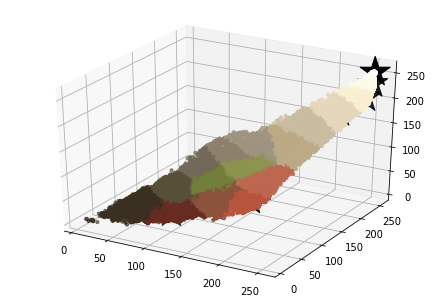

In [0]:
# Guardamos la imagen 320 x 480 en una matriz X
X=image_2d
labels = kmeans.predict(X)
# Guardamos los centros de los grupos en la matriz C
C=centroids 
#Creamos una martriz asignar que contendra los colores de cada valor RGB y asi poder mostrarlos en el grafico 3D como 
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=10)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='black', s=1000)

Se elige una matriz ramdon de colores RGB para poder mostrar el resultado del agrupamiento por K-means

In [0]:
colores_1=[]
for i in range(len(colores)):
    colores_1.append([int((random()*255)),int((random()*255)),int((random()*255))])
colores_1

[[89, 49, 106],
 [173, 122, 22],
 [160, 160, 215],
 [166, 184, 7],
 [8, 152, 85],
 [170, 154, 121],
 [222, 217, 87],
 [45, 83, 16],
 [194, 24, 92],
 [116, 56, 90],
 [165, 216, 104],
 [46, 254, 245],
 [170, 133, 101],
 [3, 140, 149],
 [201, 221, 127],
 [17, 233, 147],
 [51, 145, 166]]

In [0]:
npcolores_1 = np.asarray(colores_1)

In [0]:
F=npcolores_1/256
colores_1_hex=[]
for i in range(len(centroids)):
    colores_1_hex.append(col.to_hex(F[i]))
colores_1_hex

['#59316a',
 '#ac7a16',
 '#9f9fd6',
 '#a5b707',
 '#089755',
 '#a99979',
 '#ddd857',
 '#2d5310',
 '#c1185c',
 '#74385a',
 '#a4d768',
 '#2efdf4',
 '#a98465',
 '#038b94',
 '#c8dc7f',
 '#11e892',
 '#3390a5']

In [0]:
#colores_1=['red','green','blue','orange','brown','pink','golden','violet','purple','black']
X1=X
for i in range(len(asignar)):
    for j in range(len(colores)):
        if asignar[i]==colores[j]:
            X1[i]=colores_1[j]       

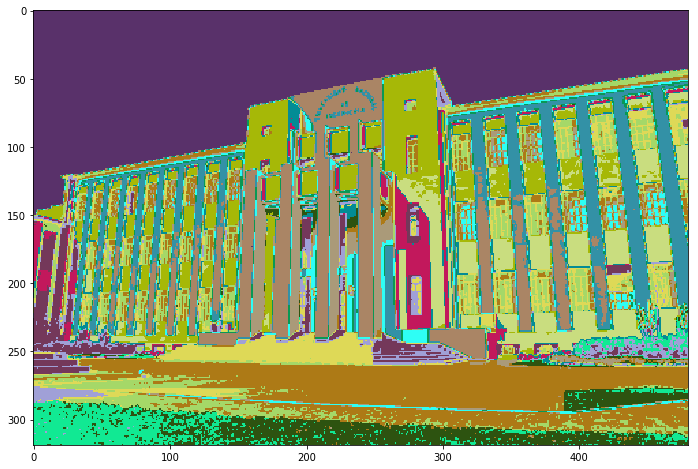

In [0]:
X1.shape
plt.figure(figsize = (15,8))
plt.imshow(X1.reshape(x, y, z))

In [0]:
num=[]
for i in range(len(centroids)):
    num.append(i)
num

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

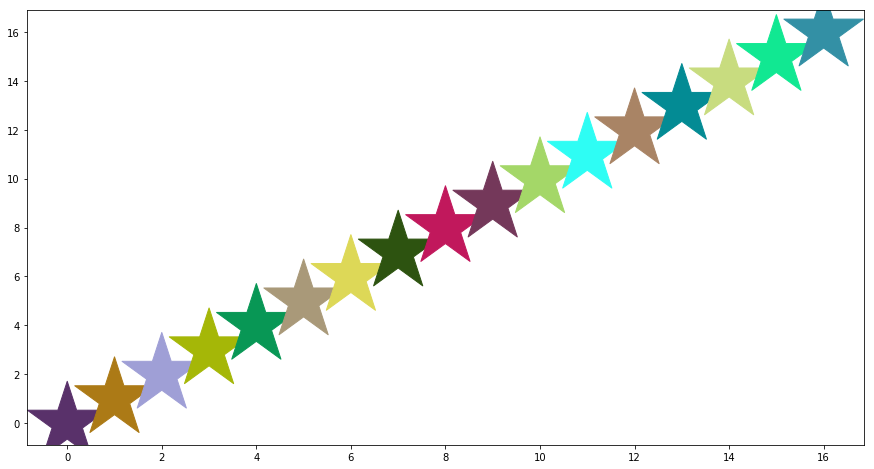

In [0]:
plt.figure(figsize = (15,8))
plt.scatter(num,num,color=colores_1_hex,marker='*',s=7000)

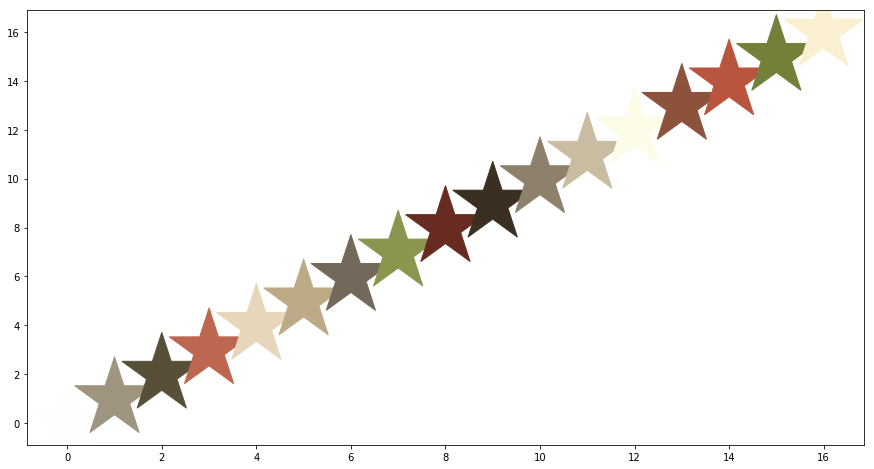

In [0]:
plt.figure(figsize = (15,8))
plt.scatter(num,num,color=colores,marker='*',s=7000)

In [0]:
imagen_reducida = imresize(image_orin,0.3)
X2 = imagen_reducida.reshape(x*y, z)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


In [0]:
count=0
# Celeste claro
ar=[4,5,12,16] #4,13
for i in range(len(asignar)):
    for j in range(len(ar)):
        if asignar[i]==colores[ar[j]]:
            X2[i]=[93,209,251]
            count=count+1
        #print(X1[i])
        
        
count

32818

In [0]:
len

In [0]:
count1=0
# Azul claro
ar=[3,13,14,8] #4,13
for i in range(len(asignar)):
    for j in range(len(ar)):
        if asignar[i]==colores[ar[j]]:
            X2[i]=[0,128,255]
            count1=count1+1
        #print(X1[i])
count1

24453

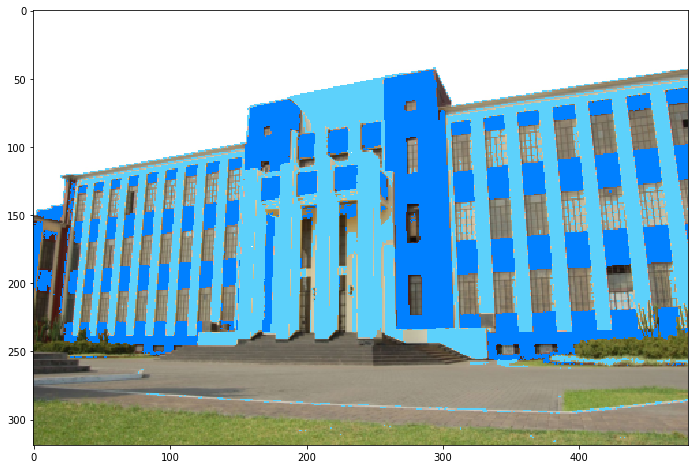

In [0]:
plt.figure(figsize = (15,8))
plt.imshow(X2.reshape(x, y, z))

In [0]:
len[]

In [0]:
# Violeta oscuro
ar=[4] #4,13
matriz_verde=[]
for i in range(len(asignar)):
    for j in range(len(ar)):
        if asignar[i]==colores[ar[j]]:
            matriz_verde.append(X2[i])
        #print(X1[i])

In [0]:
a=255
for i in range(len(matriz_verde)):
  if matriz_verde[i][0]<a:
     a=matriz_verde[i][0]   
print(a)

93


In [0]:
# Violeta claro
ar=[3,11] #4,13
for i in range(len(asignar)):
    for j in range(len(ar)):
        if asignar[i]==colores[ar[j]]:
            X2[i]=[162,142,231]
        #print(X1[i])

In [0]:
# Violeta oscuro
ar=[2,16] #4,13
for i in range(len(asignar)):
    for j in range(len(ar)):
        if asignar[i]==colores[ar[j]]:
            X2[i]=[107,82,176]
        #print(X1[i])

In [0]:
a[1]<60